In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [73]:
import cairo
num_imgs = 50000

img_size = 96
min_object_size = 12
max_object_size = 48
num_objects = 1

imgs = np.zeros((num_imgs, img_size, img_size, 4), dtype=np.uint8)  # format: BGRA
shapes = np.zeros((num_imgs, num_objects), dtype=int)
num_shapes = 2
shape_labels = ['rectangle', 'circle']
colors = np.zeros((num_imgs, num_objects), dtype=int)
num_colors = 2
color_labels = ['r', 'g']

for i_img in range(num_imgs):
    surface = cairo.ImageSurface.create_for_data(imgs[i_img], cairo.FORMAT_ARGB32, img_size, img_size)
    cr = cairo.Context(surface)

    # Fill background white.
    cr.set_source_rgb(1, 1, 1)
    cr.paint()
    
    # TODO: Try no overlap here.
    # Draw random shapes.
    for i_object in range(num_objects):
        shape = np.random.randint(num_shapes)
        shapes[i_img, i_object] = shape
        if shape == 0:  # rectangle
            w, h = np.random.randint(min_object_size, max_object_size, size=2)
            x = np.random.randint(0, img_size - w)
            y = np.random.randint(0, img_size - h)
            cr.rectangle(x, y, w, h)            
        elif shape == 1:  # circle   
            r = 0.5 * np.random.randint(min_object_size, max_object_size)
            x = np.random.randint(r, img_size - r)
            y = np.random.randint(r, img_size - r)
            cr.arc(x, y, r, 0, 2*np.pi)

        # TODO: Introduce some variation to the colors by adding a small random offset to the rgb values.
        color = np.random.randint(num_colors)
        colors[i_img, i_object] = color
        max_offset = 0.2
        r_offset, g_offset, b_offset = max_offset * 2. * (np.random.rand(3) - 0.5)
        if color == 0:
            cr.set_source_rgb(1-max_offset+r_offset, 0+g_offset, 0+b_offset)
        elif color == 1:
            cr.set_source_rgb(0+r_offset, 1-max_offset+g_offset, 0+b_offset)
        cr.fill()
        
imgs = imgs[..., 2::-1]  # is BGRA, convert to RGB

print(imgs.shape, shapes.shape, colors.shape)

((50000, 96, 96, 3), (50000, 1), (50000, 1))

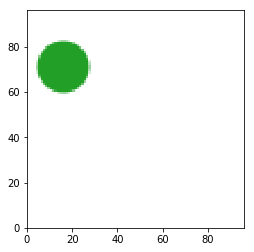

In [99]:
i = np.random.randint(num_imgs)
plt.imshow(imgs[i], interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])

In [105]:
import pandas as pd

In [116]:
import pickle
with open('generated_data.pkl', 'wb') as f:
    pickle.dump([imgs, shapes, colors], f)

In [117]:
with open('generated_data.pkl', 'rb') as f:
    imgs1, shapes1, colors1 = pickle.load(f)